Q1a. We have a continuous-time random walk given as:\
$\frac{dx}{dt} = \sigma w(t)$\
$\therefore dx = \sigma w(t) dt$\
$\therefore \int dx = \int \sigma w(t) dt$\
$\therefore x - x_0 = \sigma \int w(t) dt$\
Now, $\langle x(t) \rangle = \langle x_0 + \sigma \int w(t) dt \rangle$\
$= \langle x_0 \rangle + \langle \sigma \int w(t) dt \rangle$\
$= x_0 + \sigma \langle \int w(t) dt \rangle$\
$= x_0 + \sigma \times 0$\
$= x_0 $
Also, $\langle x - x_0 \rangle ^2 = \langle \sigma \int w(t) dt \rangle ^2 $\
$= \sigma^2 \langle \int w(t) dt \rangle ^2$\
$= \sigma^2 t $

Q1b. Simulating the ODE using Euler's method over 1000 trials, we can see that the mean x(t) is approximately 0. We can also see that the variance scales linearly as time. Specifically, $var = \sigma^2 t$.\
Plotting the time-slices histograms, also shows that the distribution spreads out over time but remains centered at 0. This aligns with the prediction of increased variance as a function of time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x0 = 0
dt = 0.5 # ms
T = 1000 # ms
sigma = 1
mean = 0
variance = 1

In [3]:
t = np.arange(0, T, dt)
x = np.zeros((1000, len(t)))

In [10]:
for iteration in range(1000):
    np.random.seed(iteration)
    for n in range(len(t)-1): 
        x[iteration, n + 1] = x[iteration, n] + sigma * np.sqrt(dt) * np.random.normal(mean, variance)

In [11]:
mean_x = np.mean(x, 0)
var_x = np.var(x, 0)

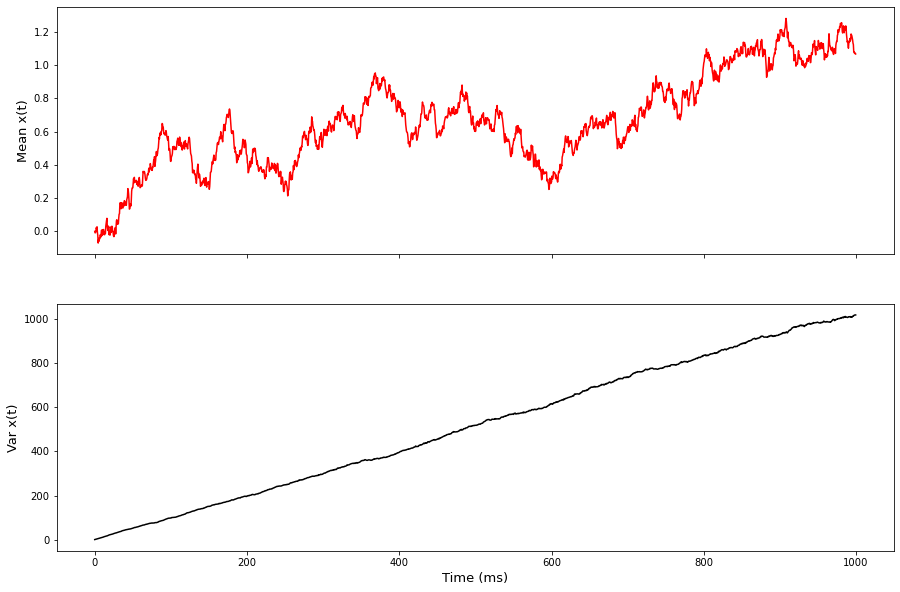

In [12]:
fig, axs = plt.subplots(2, sharex = True, figsize = (15, 10))

axs[0].plot(t, mean_x, 'r-')
axs[0].set_ylabel('Mean x(t)', fontsize = 13)
axs[1].plot(t, var_x, 'k-')
axs[1].set_xlabel('Time (ms)', fontsize = 13)
axs[1].set_ylabel('Var x(t)', fontsize = 13)
plt.show()

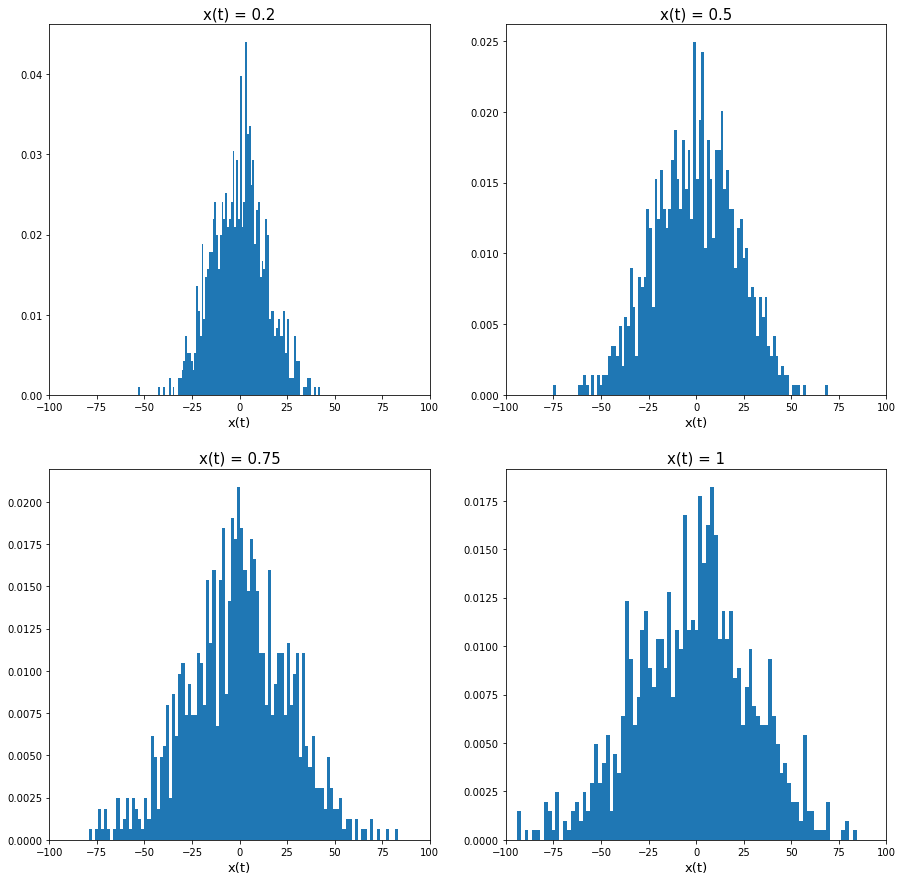

In [7]:
times_of_interest = [0.2, 0.5, 0.75, 1] #seconds
subplot_x = [0, 0, 1, 1]
subplot_y = [0, 1, 0, 1]
fig, axs = plt.subplots(2, 2, figsize = (15, 15))
for i in range(4):
    toi = times_of_interest[i]
    slice_num = int(toi * 1000 / dt) - 1
    x_slice = x[:, slice_num]
    axs[subplot_x[i], subplot_y[i]].hist(x_slice, bins = 100, density = True)
    axs[subplot_x[i], subplot_y[i]].set_title(f'x(t) = {toi}', fontsize = 15)
    axs[subplot_x[i], subplot_y[i]].set_xlabel('x(t)', fontsize = 13)
    axs[subplot_x[i], subplot_y[i]].set_xlim(-100, 100)

Q2a. The time-dependent probability $p(x, t)$ of 1D diffusion is given by:\
$\frac{\partial p(x, t)}{\partial t} = D \frac{\partial^2 p(x, t)}{\partial x^2}$\
where, $D = \sigma^2/2$\
We have to verify if:\
$p(x, t) = \frac{1}{\sigma \sqrt(2 \pi t)} exp(-\frac{(x - x_0)^2}{2\sigma^2 t})$\
satisfies the equality.\
Substituting $p(x, t)$ in LHS, we get:\
$\frac{\partial p(x, t)}{\partial t} = \frac{\partial}{\partial t} [\frac{1}{\sigma \sqrt(2 \pi t)} exp(-\frac{(x - x_0)^2}{2\sigma^2 t})]$\
$=\frac{1}{\sigma \sqrt(2 \pi t)} exp(-\frac{(x - x_0)^2}{2\sigma^2 t}) \times \frac{(x-x_0)^2}{2 \sigma^2 t^2} - \frac{1}{2\sigma t \sqrt(2 \pi t)} exp(-\frac{(x - x_0)^2}{2\sigma^2 t})$\
Similarly, we have:
$\frac{\partial p(x, t)}{\partial x} = \frac{1}{\sigma \sqrt(2 \pi t)} exp(-\frac{(x - x_0)^2}{2\sigma^2 t}) \times \frac{-(x-x_0)}{\sigma^2 t} $\
Taking the second-order derivative:\
$\frac{\partial^2 p(x, t)}{\partial x^2} = \frac{1}{\sigma \sqrt(2 \pi t)} exp(-\frac{(x - x_0)^2}{2\sigma^2 t}) \times \frac{-1}{\sigma^2 t} + \frac{1}{\sigma \sqrt(2 \pi t)} exp(-\frac{(x - x_0)^2}{2\sigma^2 t}) \times \frac{(x-x_0)^2}{\sigma^4 t^2} $\
Substituting this in RHS, we have:\
$D\frac{\partial^2 p(x, t)}{\partial x^2} = \frac{\sigma^2}{2}\frac{\partial^2 p(x, t)}{\partial x^2}$\
$=\frac{-1}{2\sigma t \sqrt(2 \pi t)} exp(-\frac{(x - x_0)^2}{2\sigma^2 t}) +  \frac{1}{\sigma \sqrt(2 \pi t)} exp(-\frac{(x - x_0)^2}{2\sigma^2 t}) \times \frac{(x-x_0)^2}{2\sigma^2 t^2} $\
As we can see, LHS = RHS.
Not sure, if this is right way to do it, but seems like LHS = RHS irrespective of initial condition!

Q2b. Plotting the normalized histograms and fitting the p(x) at different time points gives a good enough fit. The fits are able to capture the increased variance as a function of time. However, they seem to understimate the peaks.

In [8]:
# p(x, t)
def p(x, t):
    output = (1/(sigma*np.sqrt(2*np.pi*t))) * np.exp(-((x-x0)**2)/(2*sigma**2*t))
    return output

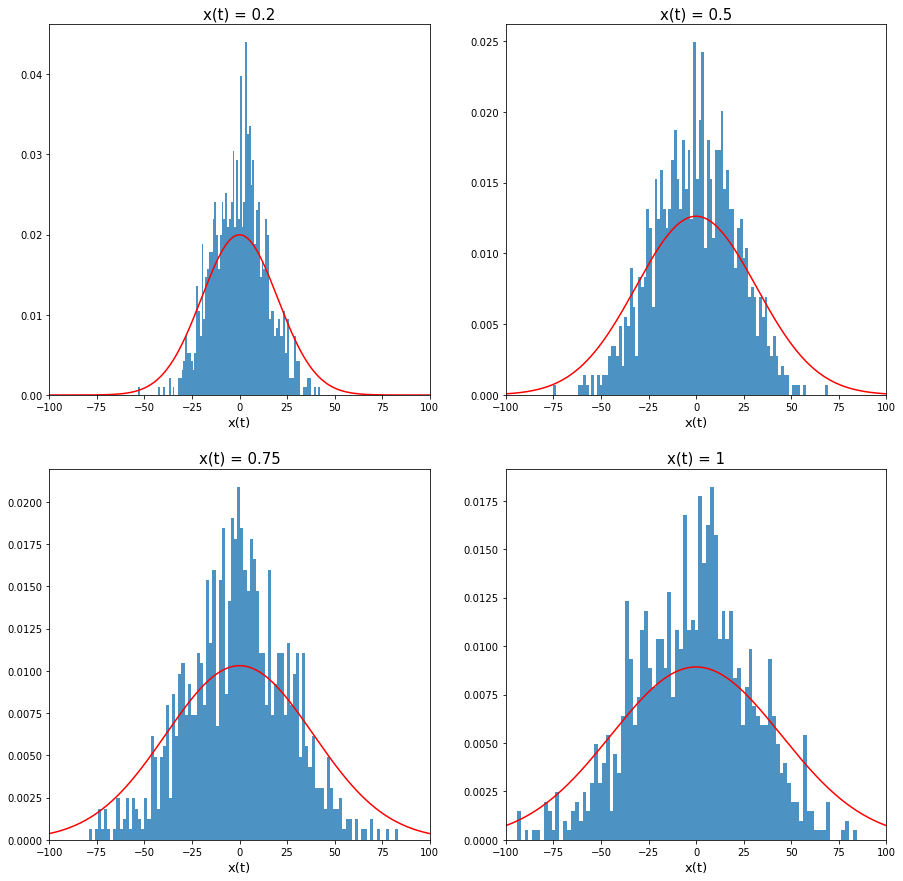

In [9]:
times_of_interest = [0.2, 0.5, 0.75, 1] #seconds
subplot_x = [0, 0, 1, 1]
subplot_y = [0, 1, 0, 1]
x_range = np.arange(-100, 100, 0.1)
fig, axs = plt.subplots(2, 2, figsize = (15, 15))
for i in range(4):
    toi = times_of_interest[i]
    
    slice_num = int(toi * 1000 / dt) - 1
    px = p(x_range, slice_num)
    x_slice = x[:, slice_num]
    axs[subplot_x[i], subplot_y[i]].hist(x_slice, bins = 100, density = True, alpha = 0.8)
    axs[subplot_x[i], subplot_y[i]].plot(x_range, px, 'r')
    axs[subplot_x[i], subplot_y[i]].set_title(f'x(t) = {toi}', fontsize = 15)
    axs[subplot_x[i], subplot_y[i]].set_xlabel('x(t)', fontsize = 13)
    axs[subplot_x[i], subplot_y[i]].set_xlim(-100, 100)